# Tutorial on the ExcludeMaskRegion objects

In this tutorial, we go over some details on the usage of the ExcludeMaskRegion objects that can be used to clean mask from specified spectral regions. 

## 0. Importing Necessary Packages

In [2]:
import specpolFlow as pol
import pandas as pd
import matplotlib.pyplot as plt

## 1. Structure of an `ExcludeMaskRegion` Object

An `ExcludeMaskRegion` object is a list of starting, stopping, and label of all regions to be excluded from the mask. The first column in the file is a the starting wavelength of each region to be excluded (in nanometers), the second is the stopping wavelength, and the third is an optional label for each region.

## 2. Creating Your Own 

To create a custom `ExcludeMaskRegion` object we must first define the regions we wish to exclude from the mask in a `.dat` file as shown below. When making the `.dat` file it is essential that the separation is a tab and if pandas is used (like below), there is no index or header in the file. 

In [32]:
start=[600,650,700] #region start in nm
stop=[620,660,780] #region stop in nm
type=['region 1','region 2','region 3'] #description (optional)
dat=pd.DataFrame([start,stop,type],index=['start','stop','type']).T
dat


,start,stop,type
0,600,620,region 1
1,650,660,region 2
2,700,780,region 3


In [33]:
dat.to_csv('ExcludeMaskRegionsClass_tutorialfiles/ExcludeMaskRegions_custom.dat',header=False,index=False,sep='\t')

In [34]:
reg = pol.read_exclude_mask_regions('ExcludeMaskRegionsClass_tutorialfiles/ExcludeMaskRegions_custom.dat')
pd.DataFrame(reg.to_dict())

,start,stop,type
0,600.0,620.0,region 1
1,650.0,660.0,region 2
2,700.0,780.0,region 3


## 3. Use the Default Functions

Two default sets of regions are included within `SpecpolFlow` as well. 

The first is the Balmer hydrogen regions. This region also requires an input parameter called `velrange` which specifies the Doppler velocity range (in km/s) around the Balmer lines to be removed. In the example below, we remove a region of 100 km/s around each Balmer line, as well as the hydrogen jump region.

The second default region is the telluric regions. These are regions of heavy atmospheric contamination that are present when taking data from ground based instruments. 

In [3]:
reg1 = pol.get_Balmer_regions_default(velrange=100)
pd.DataFrame(reg1.to_dict())

,start,stop,type
0,656.062088,656.499912,Halpha
1,485.977841,486.302159,Hbeta
2,433.905217,434.194783,Hgamma
3,410.033182,410.306818,Hdelta
4,396.877572,397.142428,Hepsilon
5,360.000000,392.000000,Hjump


In [4]:
reg2 = pol.get_telluric_regions_default()

pd.DataFrame(reg2.to_dict())

,start,stop,type
0,587.5,592.0,telluric
1,627.5,632.5,telluric
2,686.0,705.3,telluric
3,717.0,735.0,telluric
4,759.0,771.0,telluric
5,790.0,795.0,telluric
6,809.0,990.0,telluric


## 4. Combining Multiple `ExcludeMaskRegions`

If you have multiple `ExcludeMaskRegions` objects, as when using the default Balmer and telluric regions, you can combine the objects to make a single object for ease of reading and writing files, and for the mask cleaning itself. This is shown below. 

In [35]:
concat = reg1 + reg2

pd.DataFrame(concat.to_dict())

,start,stop,type
0,656.062088,656.499912,Halpha
1,485.977841,486.302159,Hbeta
2,433.905217,434.194783,Hgamma
3,410.033182,410.306818,Hdelta
4,396.877572,397.142428,Hepsilon
5,360.000000,392.000000,Hjump
6,587.500000,592.000000,telluric
7,627.500000,632.500000,telluric
8,686.000000,705.300000,telluric
9,717.000000,735.000000,telluric


## 5. Save to Files & Read from Files

`ExcludeMaskRegions` objects can also be saved and read to/from `.dat` files as shown below.

In [6]:
concat.save('ExcludeMaskRegionsClass_tutorialfiles/ExcludeMaskRegions.dat')

In [8]:
reg = pol.read_exclude_mask_regions('ExcludeMaskRegionsClass_tutorialfiles/ExcludeMaskRegions.dat')
pd.DataFrame(reg.to_dict())

,start,stop,type
0,656.0621,656.4999,Halpha
1,485.9778,486.3022,Hbeta
2,433.9052,434.1948,Hgamma
3,410.0332,410.3068,Hdelta
4,396.8776,397.1424,Hepsilon
5,360.0000,392.0000,Hjump
6,587.5000,592.0000,telluric
7,627.5000,632.5000,telluric
8,686.0000,705.3000,telluric
9,717.0000,735.0000,telluric


## 6. Using `ExcludeMaskRegions` Object to Clean a Mask

Finally, the `ExcludeMaskRegions` object can be used to clean the mask, removeing lines contained by regions defined in the `ExcludeMaskRegions` object. This creates a new cleaned mask.

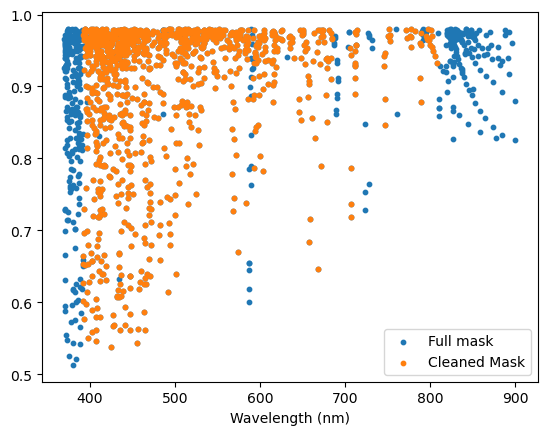

In [9]:
mask = pol.read_mask('ExcludeMaskRegionsClass_tutorialfiles/T27000G35_depth0.02.mask')

fig, ax = plt.subplots(1,1)
ax.scatter(mask.wl, 1-mask.depth, s=10, label='Full mask')
ax.set_xlabel('Wavelength (nm)')

mask_clean = mask.clean(reg).prune()
ax.scatter(mask_clean.wl, 1-mask_clean.depth, s=10, label='Cleaned Mask')

ax.legend(loc=0)

In [36]:
print(mask_clean.iuse)

[1 1 1 ... 1 1 1]
